In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Load data

In [2]:
# Load .pkl files

load_pickle = open(r'Data/Prediction/ARC_descriptor.pkl', 'rb')
data_pred = pickle.load(load_pickle)
load_pickle.close()


In [3]:
def pred_dataset(select_data, select_classifier):

    # (1) Build dataset for prediction
    
    file = os.path.join(r'Data/Descriptor',select_classifier+'_descriptor.csv')
    selXcols = [str(i) for i in list(pd.read_csv(file)['descriptor'])]
    select_data = select_data[selXcols].copy()
    select_data.sort_index(axis=1,inplace=True)

    # (2) Classifier
    
    output_CLF = pickle.load( open(os.path.join(r'Model',select_classifier+'.pkl'),"rb" ) )
    output_scaler = pickle.load( open(os.path.join(r'Model',select_classifier+'_scaler.pkl'),"rb" ) )

    return select_data, output_CLF, output_scaler
    

# Prediction: classifier Ⅰ

In [4]:
data_ARC, CLF, CLF_scaler = pred_dataset(select_data = data_pred,
                                         select_classifier='classifier1')

In [5]:
# Prediction

X_pre = CLF_scaler.transform(data_ARC.values)
CLF.predict(X_pre)
prob = CLF.predict_proba(X_pre)

prediction = pd.DataFrame()
prediction['prob_class-1'] = prob[:,0]
prediction['prob_class1'] = prob[:,1]
prediction.index = data_ARC.index

print('Predicted stable MOFs:',prediction.loc[prediction['prob_class-1']>0.5].shape[0])


Predicted stable MOFs: 129661


DB0: Stable-98662 (0.4907) ,  Untable-102388 (0.5093)
DB1: Stable-11175 (0.488) ,  Untable-11724 (0.512)
DB2: Stable-11 (0.4583) ,  Untable-13 (0.5417)
DB3: Stable-34 (0.2881) ,  Untable-84 (0.7119)
DB4: Stable-6 (0.3) ,  Untable-14 (0.7)
DB5: Stable-4254 (0.1932) ,  Untable-17761 (0.8068)
DB6: Stable-5316 (0.5982) ,  Untable-3570 (0.4018)
DB7: Stable-2483 (0.3609) ,  Untable-4397 (0.6391)
DB8: Stable-2 (0.3333) ,  Untable-4 (0.6667)
No DB type: 9
DB10: Stable-0 (0.0) ,  Untable-4 (1.0)
No DB type: 11
DB12: Stable-3996 (0.5897) ,  Untable-2780 (0.4103)
DB13: Stable-2690 (0.5594) ,  Untable-2119 (0.4406)
DB14: Stable-47 (0.6812) ,  Untable-22 (0.3188)
DB15: Stable-985 (0.5884) ,  Untable-689 (0.4116)


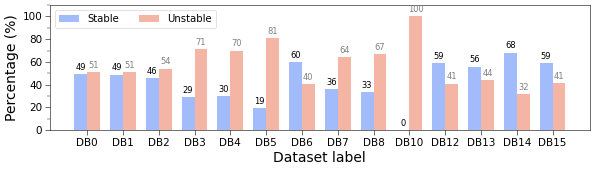

In [6]:
# Visualization

pred_stat = []
prediction.sort_values(by=prediction.columns[0],ascending=False,inplace=True)

for i in range(16):
    try:
        plot_index = [ii for ii in prediction.index if ii.split("-")[0]=='DB'+str(i)]
        plot_t = prediction.loc[plot_index,:]
        s,u = plot_t[plot_t['prob_class-1']>0.5].shape[0], plot_t[plot_t['prob_class-1']<0.5].shape[0]
        print('DB'+str(i)+':',f'Stable-{s}',f'({round(s/(s+u),4)})',', ',f'Untable-{u}',f'({round(u/(s+u),4)})')
        pred_stat.append(['DB'+str(i),s/(s+u),u/(s+u),s+u])       
    except:
        pred_stat.append(['DB'+str(i),0,0,0])
        print('No DB type:',i)
pred_stat = [i for i in pred_stat if i[-1]!=0]

outer_colors = sns.color_palette(palette='coolwarm', n_colors=4)

d = 0.18
plot_x = np.arange(len(pred_stat))
plot_y1 = [i[1] for i in pred_stat]
plot_y2 = [i[2] for i in pred_stat]

fig = plt.figure(figsize=(12,3.5), dpi=50)
ax = fig.add_subplot(111)

ax.bar(plot_x-d, plot_y1, color=outer_colors[0], alpha=0.7, width=2*d, label='Stable')
ax.bar(plot_x+d, plot_y2, color=outer_colors[3], alpha=0.6, width=2*d, label='Unstable')

for a,b,c in zip(plot_x, plot_y1, plot_y2):
    plt.text(a-d, b+0.02, '%.0f' % (b*100), ha='center', va= 'bottom', fontsize=12)
    plt.text(a+d, c+0.02, '%.0f' % (c*100), ha='center', va= 'bottom',color='gray',fontsize=12)

ax.tick_params(labelsize=15)
ax.set_xlabel('Dataset label', fontsize=20, labelpad=5)
ax.set_ylabel('Percentage (%)', fontsize=20, labelpad=5)
ax.set_xticks(plot_x,plot_x)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0],[0,20,40,60,80,100])
ax.set_xticklabels([i[0] for i in pred_stat],fontsize=15)
ax.set_ylim([0,1.1])

ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major',direction='out',length=7)
ax.tick_params(which='minor',direction='out',length=4)
ax.legend(fontsize=14.5,ncol=2, loc='upper left')
fig.tight_layout()
plt.show()

# Prediction: classifier Ⅱ

In [7]:
data_ARC, CLF, CLF_scaler = pred_dataset(select_data = data_pred,
                                         select_classifier='classifier2')

In [8]:
# Prediction

X_pre = CLF_scaler.transform(data_ARC.values)
CLF.predict(X_pre)
prob = CLF.predict_proba(X_pre)

prediction = pd.DataFrame()
prediction['prob_class-1'] = prob[:,0]
prediction['prob_class1'] = prob[:,1]
prediction.index = data_ARC.index

print('Predicted stable MOFs:',prediction.loc[prediction['prob_class-1']>0.5].shape[0])


Predicted stable MOFs: 151923


DB0: Stable-110553 (0.5448) ,  Untable-92374 (0.4552)
DB1: Stable-13266 (0.5703) ,  Untable-9994 (0.4297)
DB2: Stable-11 (0.4583) ,  Untable-13 (0.5417)
DB3: Stable-74 (0.6271) ,  Untable-44 (0.3729)
DB4: Stable-19 (0.95) ,  Untable-1 (0.05)
DB5: Stable-9311 (0.419) ,  Untable-12909 (0.581)
DB6: Stable-4465 (0.4914) ,  Untable-4621 (0.5086)
DB7: Stable-2891 (0.4157) ,  Untable-4063 (0.5843)
DB8: Stable-4 (0.5) ,  Untable-4 (0.5)
No DB type: 9
DB10: Stable-4 (0.6667) ,  Untable-2 (0.3333)
No DB type: 11
DB12: Stable-5887 (0.8574) ,  Untable-979 (0.1426)
DB13: Stable-3904 (0.7998) ,  Untable-977 (0.2002)
DB14: Stable-61 (0.8841) ,  Untable-8 (0.1159)
DB15: Stable-1473 (0.8655) ,  Untable-229 (0.1345)


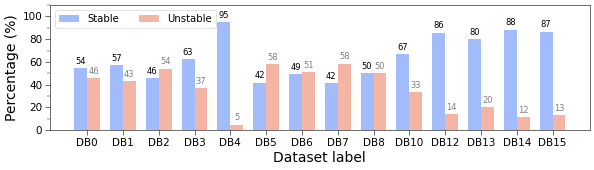

In [9]:
# Visualization

pred_stat = []
prediction.sort_values(by=prediction.columns[0],ascending=False,inplace=True)

for i in range(16):
    try:
        plot_index = [ii for ii in prediction.index if ii.split("-")[0]=='DB'+str(i)]
        plot_t = prediction.loc[plot_index,:]
        s,u = plot_t[plot_t['prob_class-1']>0.5].shape[0], plot_t[plot_t['prob_class-1']<0.5].shape[0]
        print('DB'+str(i)+':',f'Stable-{s}',f'({round(s/(s+u),4)})',', ',f'Untable-{u}',f'({round(u/(s+u),4)})')
        pred_stat.append(['DB'+str(i),s/(s+u),u/(s+u),s+u])       
    except:
        pred_stat.append(['DB'+str(i),0,0,0])
        print('No DB type:',i)
pred_stat = [i for i in pred_stat if i[-1]!=0]

outer_colors = sns.color_palette(palette='coolwarm', n_colors=4)

d = 0.18
plot_x = np.arange(len(pred_stat))
plot_y1 = [i[1] for i in pred_stat]
plot_y2 = [i[2] for i in pred_stat]

fig = plt.figure(figsize=(12,3.5), dpi=50)
ax = fig.add_subplot(111)

ax.bar(plot_x-d, plot_y1, color=outer_colors[0], alpha=0.7, width=2*d, label='Stable')
ax.bar(plot_x+d, plot_y2, color=outer_colors[3], alpha=0.6, width=2*d, label='Unstable')

for a,b,c in zip(plot_x, plot_y1, plot_y2):
    plt.text(a-d, b+0.02, '%.0f' % (b*100), ha='center', va= 'bottom', fontsize=12)
    plt.text(a+d, c+0.02, '%.0f' % (c*100), ha='center', va= 'bottom',color='gray',fontsize=12)

ax.tick_params(labelsize=15)
ax.set_xlabel('Dataset label', fontsize=20, labelpad=5)
ax.set_ylabel('Percentage (%)', fontsize=20, labelpad=5)
ax.set_xticks(plot_x,plot_x)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0],[0,20,40,60,80,100])
ax.set_xticklabels([i[0] for i in pred_stat],fontsize=15)
ax.set_ylim([0,1.1])

ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major',direction='out',length=7)
ax.tick_params(which='minor',direction='out',length=4)
ax.legend(fontsize=14.5,ncol=2, loc='upper left')
fig.tight_layout()
plt.show()